In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis="columns", inplace=True)

In [4]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()
df1 = df[df['TotalCharges'] != ' ']
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
for column in df1:
    if df1[column].dtypes == 'object' or 'int':
        print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [7]:
df1['MultipleLines'].replace('No phone service', 'No', inplace=True)
df1['OnlineSecurity'].replace('No internet service', 'No', inplace=True)
df1['OnlineBackup'].replace('No internet service', 'No', inplace=True)
df1['DeviceProtection'].replace('No internet service', 'No', inplace=True)
df1['TechSupport'].replace('No internet service', 'No', inplace=True)
df1['StreamingTV'].replace('No internet service', 'No', inplace=True)
df1['StreamingMovies'].replace('No internet service', 'No', inplace=True)

/home/viny_joshi/venv/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [8]:
Yes_No_Fields = ['Partner', 'Dependents', 'PhoneService','MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for i in Yes_No_Fields:
    df1[i].replace({'Yes' : 1, 'No': 0}, inplace=True)
    
df1.replace({'Male' : 1, 'Female' : 0}, inplace=True)

/home/viny_joshi/venv/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [9]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService','Contract', 'PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [10]:
Scaleable_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
df2[Scaleable_cols] = scaler.fit_transform(df2[Scaleable_cols])

In [11]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [12]:
from sklearn.model_selection import train_test_split

In [20]:
X = df2.drop('Churn', axis='columns')
Y = df2['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, random_state=10)

In [21]:
x_train.shape

(6328, 26)

In [22]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
198/198 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8017
Epoch 2/200
198/198 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.8033
Epoch 3/200
198/198 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8064
Epoch 4/200
198/198 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8074
Epoch 5/200
198/198 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8058
Epoch 6/200
198/198 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8067
Epoch 7/200
198/198 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8072
Epoch 8/200
198/198 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8075
Epoch 9/200
198/198 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8099
Epoch 10/200
198/198 [==============================] - 0s 2ms/step - loss: 0.4073 - accura

198/198 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8358
Epoch 161/200
198/198 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8385
Epoch 162/200
198/198 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8347
Epoch 163/200
198/198 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8366
Epoch 164/200
198/198 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8382
Epoch 165/200
198/198 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8341
Epoch 166/200
198/198 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8364
Epoch 167/200
198/198 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8385
Epoch 168/200
198/198 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8394
Epoch 169/200
198/198 [==============================] - 0s 1ms/step - loss: 0.3546 - a

In [36]:
model.evaluate(x_test, y_test)
yp = model.predict(x_test)

22/22 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.7940


In [37]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Text(69.0, 0.5, 'Truth')

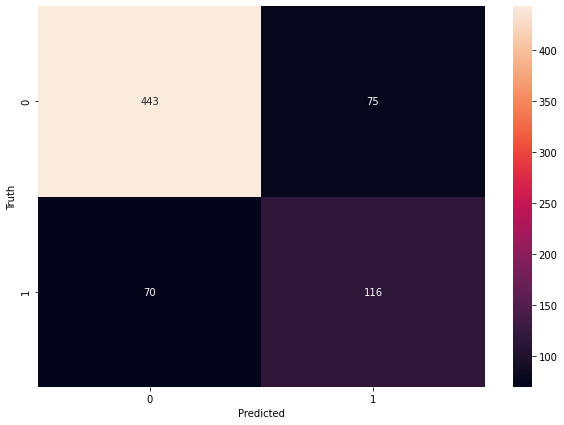

In [41]:
import matplotlib.pyplot as plt
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       518
           1       0.61      0.62      0.62       186

    accuracy                           0.79       704
   macro avg       0.74      0.74      0.74       704
weighted avg       0.80      0.79      0.79       704



## Exercise

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [116]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [117]:
df1 = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis='columns')
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [118]:
Fields_toScale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Fields_toencode = ['Geography']
object_tobinary = ['Gender']

In [119]:
df1['Gender'] = df1.Gender.replace({'Female': 1, 'Male' : 0})

In [120]:
scaler = MinMaxScaler()
df1[Fields_toScale] = scaler.fit_transform(df1[Fields_toScale])

In [121]:
df1 = pd.get_dummies(data=df1, columns=Fields_toencode)
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [123]:
X = df1.drop('Exited', axis='columns')
Y = df1.Exited

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, random_state=10)

In [128]:
import tensorflow as tf
from tensorflow import keras

In [131]:
X.shape

(10000, 12)

In [151]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(12,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [152]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
282/282 [==============================] - 1s 943us/step - loss: 0.5000 - accuracy: 0.7912
Epoch 2/50
282/282 [==============================] - 0s 970us/step - loss: 0.4614 - accuracy: 0.7991
Epoch 3/50
282/282 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8062
Epoch 4/50
282/282 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8122
Epoch 5/50
282/282 [==============================] - 0s 991us/step - loss: 0.4290 - accuracy: 0.8158
Epoch 6/50
282/282 [==============================] - 0s 979us/step - loss: 0.4230 - accuracy: 0.8164
Epoch 7/50
282/282 [==============================] - 0s 933us/step - loss: 0.4170 - accuracy: 0.8183
Epoch 8/50
282/282 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8249
Epoch 9/50
282/282 [==============================] - 0s 987us/step - loss: 0.3983 - accuracy: 0.8298
Epoch 10/50
282/282 [==============================] - 0s 994us/step - loss: 0.3875 - ac

In [153]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 985us/step - loss: 0.4016 - accuracy: 0.8280


[0.40158936381340027, 0.828000009059906]

In [154]:
yp = model.predict(x_test)

In [155]:
y_pred = []
for i in yp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [159]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       779
           1       0.64      0.49      0.56       221

    accuracy                           0.83      1000
   macro avg       0.76      0.71      0.73      1000
weighted avg       0.82      0.83      0.82      1000



<AxesSubplot:>

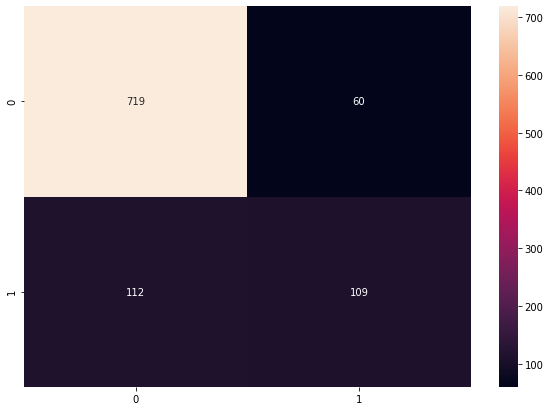

In [164]:
import seaborn as sn

cm = cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')